In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [ ]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.sample(5)

,Target,Text
1690,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
1526,ham,"Wow ... I love you sooo much, you know ? I can..."
42,spam,07732584351 - Rodger Burns - MSG = We tried to...
4976,ham,A boy was late 2 home. His father: \POWER OF F...
3322,ham,"She said,'' do u mind if I go into the bedroom..."


In [ ]:
df.duplicated().sum()

403

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [ ]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [ ]:
df.tail()

,Target,Text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
df['Target']=encoder.fit_transform(df['Target'])

In [ ]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x7856aec60850>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

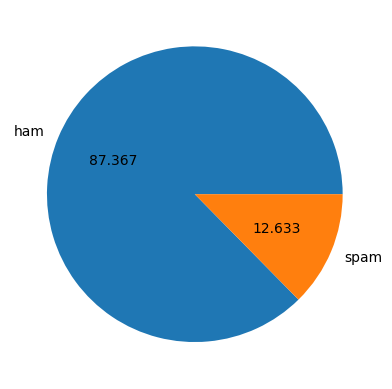

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.3f")

In [ ]:
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [ ]:
df['num_characters']=df['Text'].apply(len)

In [ ]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [ ]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24
1,0,Ok lar... Joking wif u oni...,29,8,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37
3,0,U dun say so early hor... U c already then say...,49,13,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15


In [ ]:
df[df['Target']==0][['num_words','num_sentences','num_characters']].describe()

,num_words,num_sentences,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,17.123782,70.459256
std,13.493970,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,8.000000,34.000000
50%,13.000000,13.000000,52.000000
75%,22.000000,22.000000,90.000000
max,220.000000,220.000000,910.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

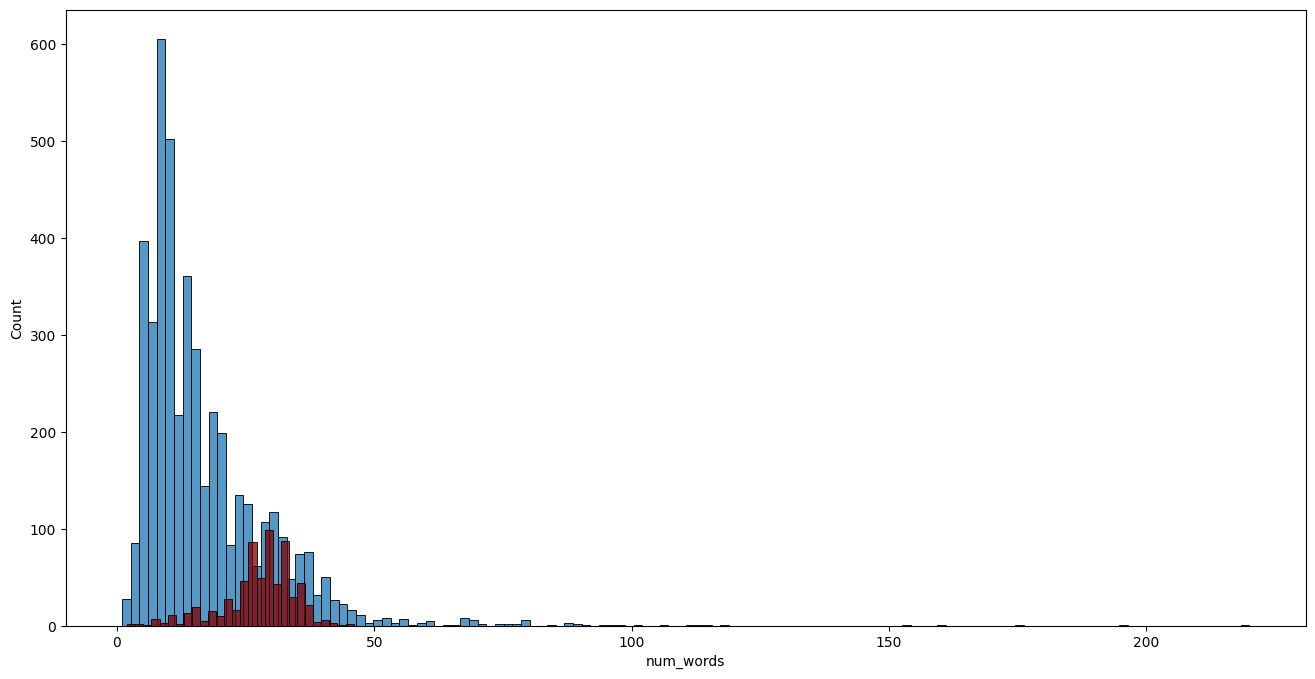

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='maroon')

<Axes: xlabel='num_sentences', ylabel='Count'>

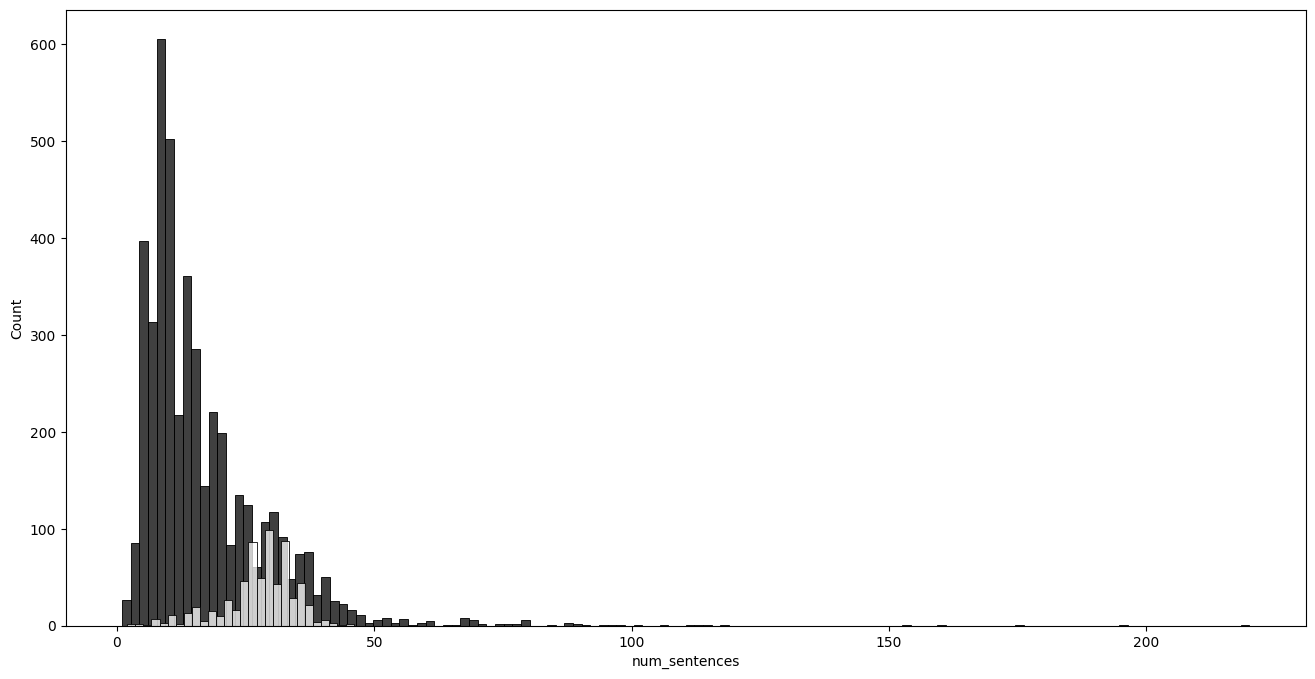

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(df[df['Target']==0]['num_sentences'],color='black')
sns.histplot(df[df['Target']==1]['num_sentences'],color='white')

<Axes: xlabel='num_characters', ylabel='Count'>

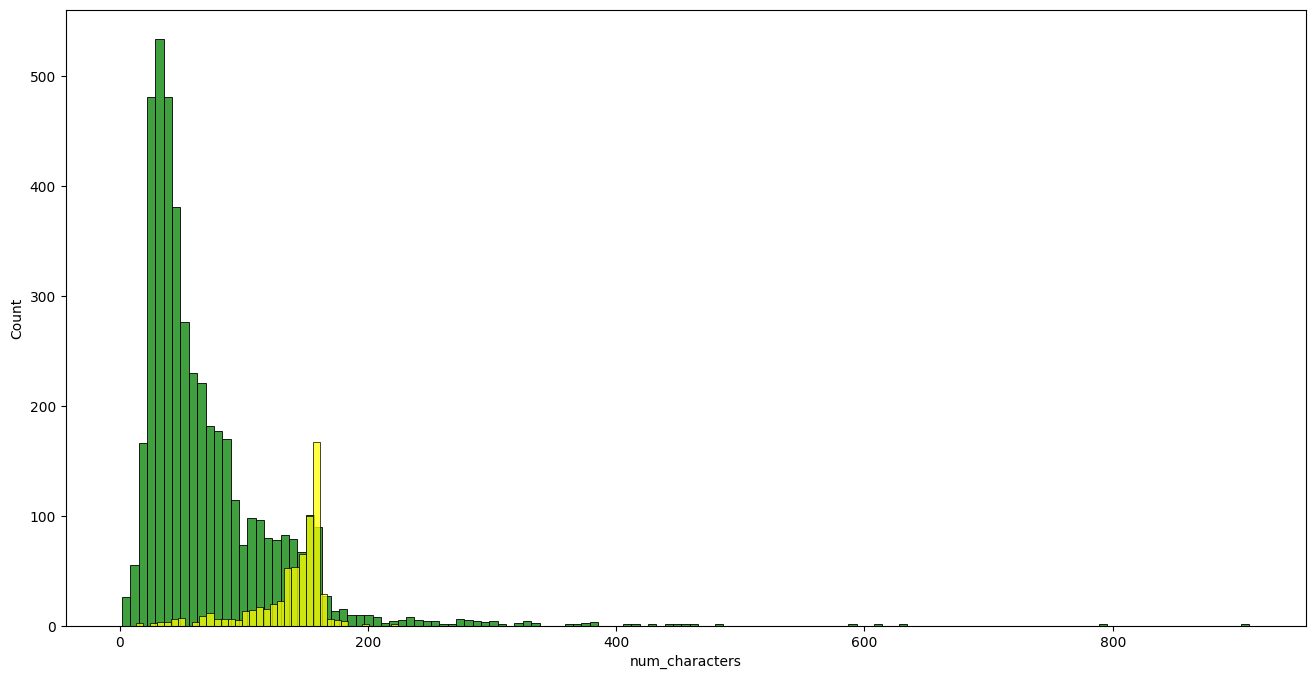

In [ ]:
plt.figure(figsize=(16,8))
sns.histplot(df[df['Target']==0]['num_characters'],color='green')
sns.histplot(df[df['Target']==1]['num_characters'],color='yellow')

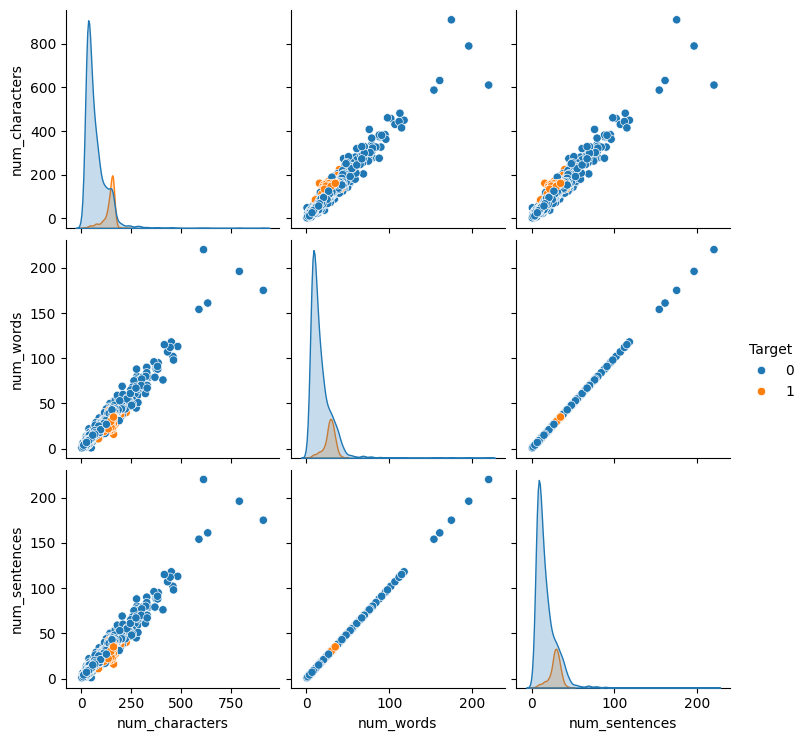

In [ ]:
sns.pairplot(df,hue='Target')

<ipython-input-37-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

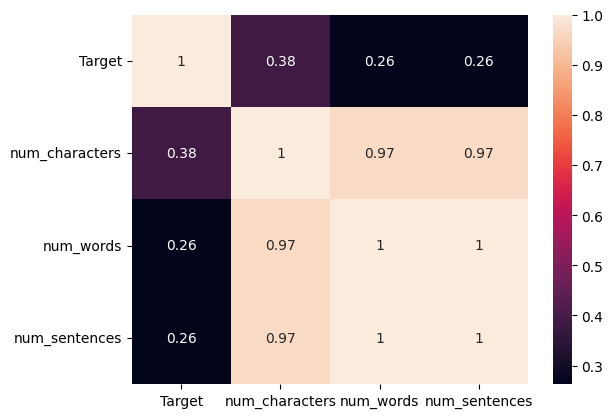

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from string import punctuation

def transfer(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
   if i not in stopwords.words('english') and i not in string.punctuation:
     y.append(i)

     text=y[:]
     y.clear()

     for i in text:
      y.append(ps.stem(i))
  return  "  ".join(y)


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import(PorterStemmer)
ps=PorterStemmer()

In [ ]:
transfer("HEY EVERYONE MY name is SIDDHI ketley!!!! & I am from SHRI ram..@@")

'hey  everyon  name  siddhi  ketley  shri  ram'

In [ ]:
df['transfer_Text']=df['Text'].apply(transfer)

In [ ]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transfer_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,24,go jurong point crazi avail bugi n grea...
1,0,Ok lar... Joking wif u oni...,29,8,8,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,37,free entri 2 wkli comp win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,13,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,15,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc=wc.generate(df[df['Target']==1]['transfer_Text'].str.cat(sep=""))

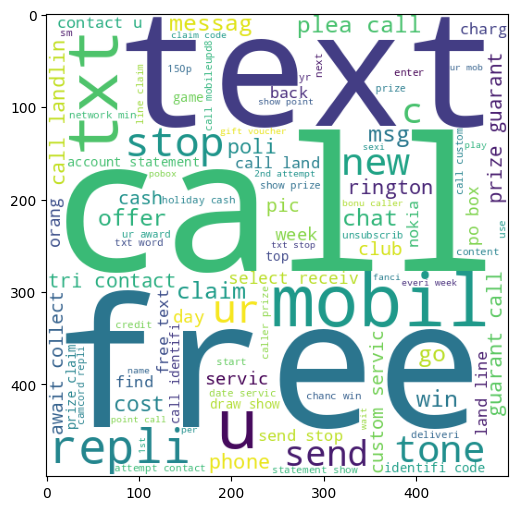

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
x=cv.fit_transform(df['transfer_Text']).toarray()

In [ ]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
x.shape

(5169, 6714)

In [ ]:
y=df['Target'].values

In [ ]:
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
sv=SVC()

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
sv.fit(x_train,y_train)

SVC()

In [ ]:
y_pred1=nb.predict(x_test)

In [ ]:
y_pred2=dt.predict(x_test)

In [ ]:
y_pred3=rf.predict(x_test)

In [ ]:
y_pred4=sv.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

In [ ]:
print("Accuracy score of random forest is=",accuracy_score(y_pred3,y_test)*100)
print("Accuracy score of SVM is=",accuracy_score(y_pred4,y_test)*100)
print("Accuracy score of Decision Tree is=",accuracy_score(y_pred2,y_test)*100)
print("Accuracy score of naive byes is=",accuracy_score(y_pred1,y_test)*100)

Accuracy score of random forest is= 96.71179883945842
Accuracy score of SVM is= 96.42166344294004
Accuracy score of Decision Tree is= 95.64796905222437
Accuracy score of naive byes is= 88.10444874274661


In [ ]:
print("Precision score of random forest is=",precision_score(y_pred3,y_test)*100)
print("Precision score of naive bayes is=",precision_score(y_pred1,y_test)*100)
print("Precision score of Decision tree is=",precision_score(y_pred2,y_test)*100)
print("Precision score of SVM is=",precision_score(y_pred4,y_test)*100)



Precision score of random forest is= 74.01574803149606
Precision score of naive bayes is= 85.03937007874016
Precision score of Decision tree is= 74.01574803149606
Precision score of SVM is= 71.65354330708661


In [ ]:
print("classification report for Random Forest is=")
print(classification_report(y_pred3,y_test))

classification report for Random Forest is=
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       939
           1       0.74      0.99      0.85        95

    accuracy                           0.97      1034
   macro avg       0.87      0.98      0.91      1034
weighted avg       0.98      0.97      0.97      1034

